In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [62]:
node_embeddings = pd.read_csv('../emb/bitcoin-50dims.emb', skiprows=[0], index_col=0, header=None, sep=' ')
tsne_embeddings = pd.read_csv('tsne_50dim.csv', skiprows=[0], header=None, names=['ids', 'x', 'y'])

In [73]:
def enhance_with_clusterings(embeddings):
    clustering = DBSCAN(eps=50, min_samples=100).fit(embeddings)
    return clustering.labels_

def get_colormap_norm(name, num_colors, log_norm=False):
    cmap = cm.get_cmap(name)
    norm_type = colors.LogNorm if log_norm else colors.Normalize  
    norm = norm_type(vmin=1.0, vmax=num_colors - 1)
    
    def get_color_norm(data_val, norm, cmap):
        norm_color = norm(data_val)    
        return cmap(norm_color)
    
    return lambda color: get_color_norm(color, norm, cmap)

def show_embeddings(data, colormap):
    plt.figure(figsize=(18, 18))
    clusters = data['cluster'].unique()
    for i, cluster in enumerate(clusters):
        color = colormap(i)
    
        #add data points 
        plt.scatter(x=data.loc[data['cluster']==cluster, 'x'], 
                    y=data.loc[data['cluster']==cluster, 'y'],
                    c=color)
        
        #add label        
        plt.annotate(cluster, 
                     data.loc[data['cluster']==cluster, ['x','y']].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=20)
    plt.show()
    
def get_cluster_members(df, cluster):
    return df[df['cluster'] == cluster].index.values

In [74]:
node_clusters = enhance_with_clusterings(node_embeddings)
tsne_embeddings['cluster'] = pd.Series(clusters)

Density-based clustering
9


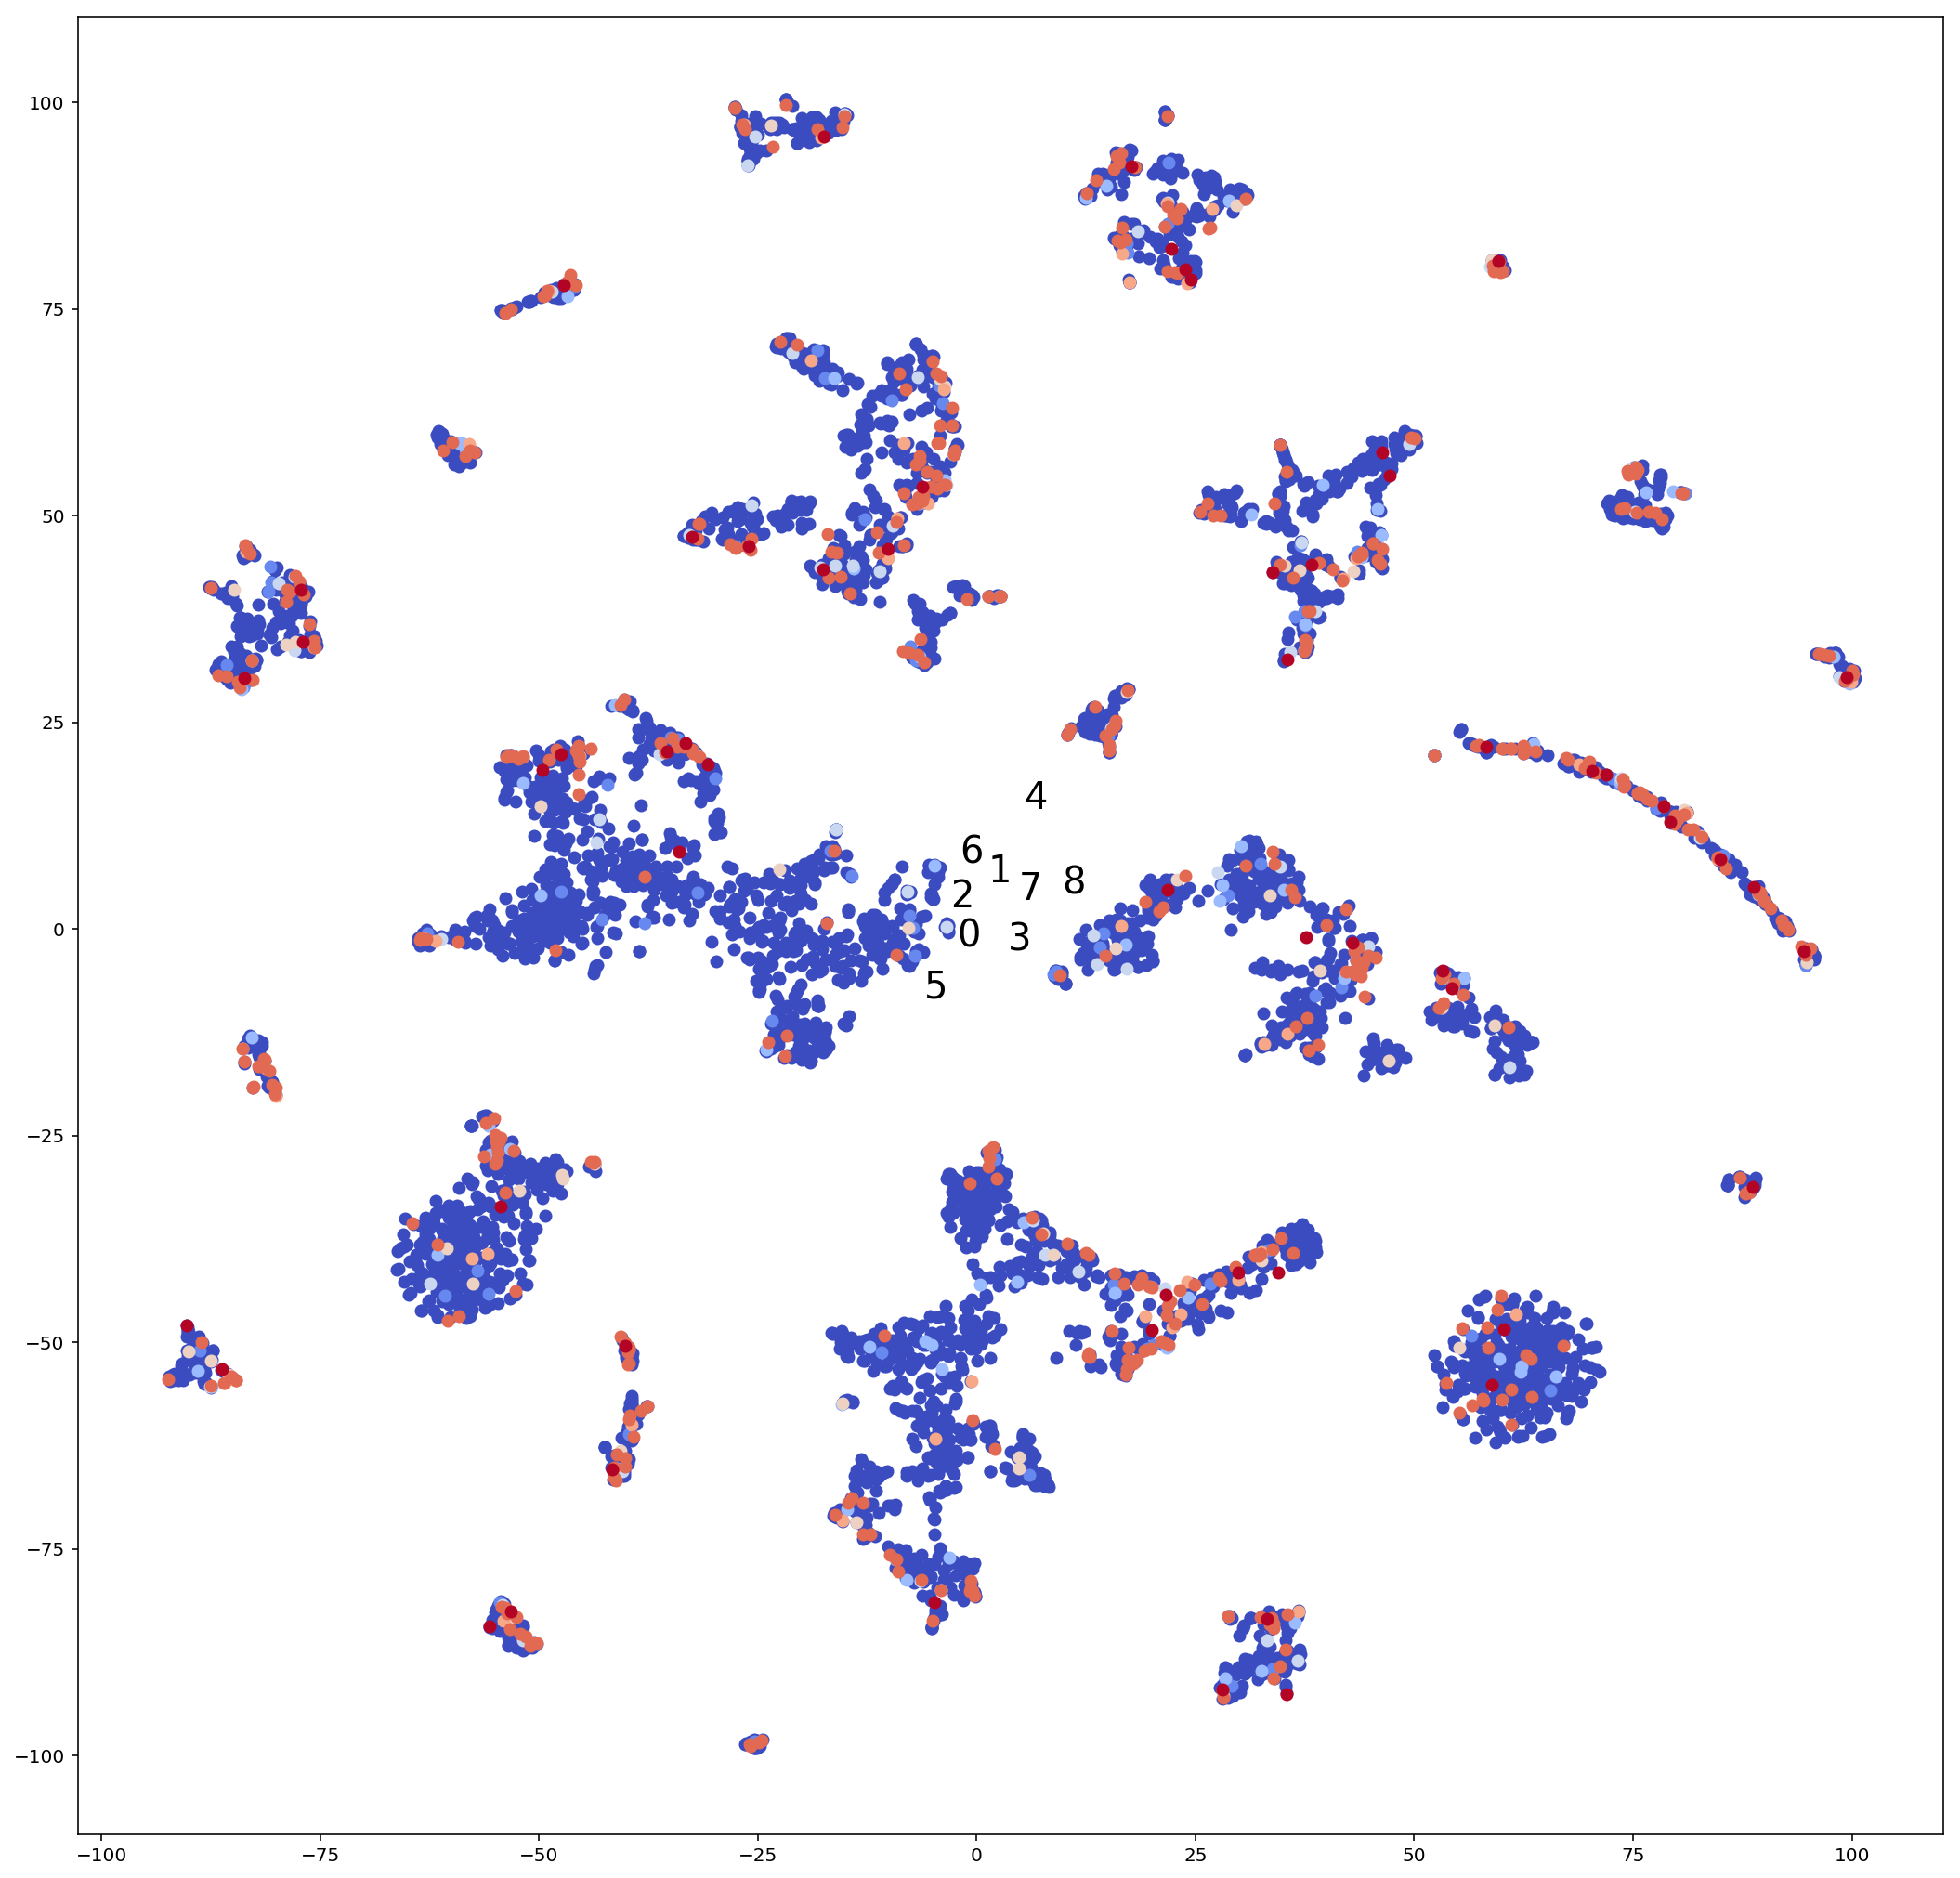

In [75]:
#cluster = get_cluster_members(node_embeddings, 0)
num_clusters = tsne_embeddings['cluster'].unique().shape[0]
cmap = get_colormap_norm('coolwarm', num_clusters)
print("Density-based clustering")
print(num_clusters)
show_embeddings(tsne_embeddings, cmap)